Assignment 1B

NAME: VIVEK KUMAR BHARATI

ROLL NO.: 22M1081

Question: Use your previous synthesized vowel /u/ at two distinct pitches (F0 = 120 Hz, F0 = 220 Hz).
Keep the bandwidths constant at 100 Hz for all formants.


Vowel F1, F2, F3

/u/ 300, 870, 2240

We would like to use the DFT computed with various window lengths and shapes to estimate the vowel’s
F0 and formant frequencies and study the obtained accuracies with reference to our ‘ground truth’ values.
For the analysis, use a single waveform segment near the centre of your synthesized vowel.

Plot the magnitude (dB) spectrum with rectangular and Hamming windows of lengths: 5 ms, 10 ms, 20
ms, 40 ms, each with a large zero-padded DFT. (i) Comment on the similarities and differences between
the different computed spectra. (ii) Estimate the signal parameters from each of the magnitude spectra and
report the error with respect to the ground-truth.

##Complete anaysis for F0 = 120 Hz##

##Synthesis of vowel /u/ at F0 = 120 Hz:## 

In [756]:
import numpy as np
import scipy.io.wavfile
import IPython.display
from scipy import signal    # Signal is used to find the frequency response points of the single formant resonator
import numpy as np          # numpy library is imported
import matplotlib.pyplot as plt    # matplotlib is used to plot figures

In [757]:
def createInpWaveform(sampFreq, timeDuration, F0, numSamplesTriangle):
    numCycles = F0*timeDuration;                          # number of cycles for given source excitation frequency in 0.5 sec
    numSamplesPerCycle = sampFreq/F0;                     # number of samples per cycle = sampFreq/fundamental freq of source excitation = 100 in this case
    inpWaveform = np.zeros(int(sampFreq*timeDuration));   # input waveform declared as an array of zeros for 8000 samples so that it covers 0.5 sec time duration.
    triangle = np.zeros(numSamplesTriangle);              # declare a triangle array which stores the samples of a single triangle
    for i in range(numSamplesTriangle):                   # For loop creates 1 triangle comprising 5 samples
        if i<=2:
            triangle[i] = 0.5*i;
        elif i>2:
            triangle[i] = -0.5*i+2;
    impulsePos = np.zeros(int(F0*timeDuration));            # This array contains the positions of impulses in the input signal
    impulseWaveform = np.zeros(int(sampFreq*timeDuration)); # This array will store the output of convolution
    for i in range(int(F0*timeDuration)):                   # In tis for loop an impulse train is created which contains impulses placed at sample indices according to the given F0 
      impulsePos[i] = round((sampFreq/F0)*i);
      impulseWaveform[round((sampFreq/F0)*i)] = 1;
    inpWaveform = signal.convolve(impulseWaveform,triangle,mode='same');  # To create an impulse train where impulses are approximated by narrow triangles we convolve the triangle in triangle[] array with impulseWaveform
    return inpWaveform                                      # Return the impulse train waveform where impulses are approximated by narrow triangles of 5 samples each.

  1) The above function **createInpWaveform()** is used to create an impulse train waveform in which each impulse is approximated by a narrow triangle. In the impulse train waveform created in this function the triangular impulses repeat after every (sampFreq/F0) number of samples. This function is used in every code block after this to create the input impulse train.

  2) The impulses are placed at nearest rounded off values i.e. the integer multiples of sampFreq/F0 is not an integer if sampling frequency is not a multiple of F0 so in that case the impulses are placed at rounded off values.

  3) For eg: F0 = 120 Hz and sampFreq = 16000. sampFreq/F0 = 133.33. So second impulse will be placed at round(133.33) = 133 rd index. Similarly, third impulse can be placed at round(133.33*2) = round(266.66) = 267 th index position and so on. 

In [758]:
def convOutput(inpWaveform,F0, sampFreq, timeDuration, prevOutput1_Coeff, prevOutput2_Coeff):
  numOutputSamples = sampFreq*timeDuration;       # total number of samples in output waveform
  outputData = np.zeros(len(inpWaveform));        # declare a numpy array for storing output data
  y_buffer = np.zeros(2);                         # declare a buffer used to store previous outputs needed for difference equation implementation
  for i in range(len(outputData)):
      # the difference equation obtained from the transfer function:
      outputData[i] = inpWaveform[i] + prevOutput1_Coeff*y_buffer[0] + prevOutput2_Coeff*y_buffer[1]; 
      y_buffer[0] = outputData[i]; # stores the previous output in the buffer as the difference equation needs past 2 values in every iteration
      if i>0:        
          y_buffer[1] = outputData[i-1];  # Stores the second last sample in y_buffer[1]  
  return outputData

**convOutput() function:** 

This function takes an input waveform (in our case the source excitation waveform in which we have approximated the impulses by narrow triangles of width = 5) and the coefficients of a second order difference equation (in our case this is the formant) and gives the output waveform of same length as the input waveform.

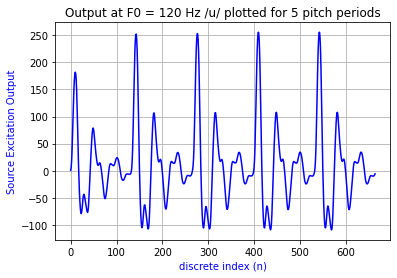

In [759]:
'''
F0 = 120 Hz 
B = 100 Hz
Duration = 0.5 sec
F1 = 300 Hz, F2 = 870 Hz, F3 = 2240 Hz
'''
sampFreq = 16000;                       
timeDuration = 0.5;                     
F0 = 120;                               
numSamplesTriangle = 5;
inpWaveform = createInpWaveform(sampFreq, timeDuration, F0, numSamplesTriangle);  # input waveform is generated
outputData_F1 = convOutput(inpWaveform, F0, sampFreq, timeDuration, prevOutput1_Coeff=1.94, prevOutput2_Coeff=-0.96);     # F1 output
outputData_F2 = convOutput(outputData_F1, F0, sampFreq, timeDuration, prevOutput1_Coeff=1.847, prevOutput2_Coeff=-0.96);  # F2 output
outputData_F3 = convOutput(outputData_F2, F0, sampFreq, timeDuration, prevOutput1_Coeff=1.2494, prevOutput2_Coeff=-0.96); # F3 output

fig = plt.figure();
plt.title('Output at F0 = 120 Hz /u/ plotted for 5 pitch periods');           
plt.plot(range(int(sampFreq/F0)*5), outputData_F3[0:int(sampFreq/F0)*5], 'b');   
plt.ylabel('Source Excitation Output', color='b');                            
plt.xlabel('discrete index (n)',color='b');                                   
plt.grid();                                                                  
plt.axis('tight');                                                           
plt.show();

outputData_F3 = np.asarray(outputData_F3,dtype=np.float32);                       
scipy.io.wavfile.write('Que4_u_1_Source_Excit.wav', sampFreq, outputData_F3);      
IPython.display.Audio('Que4_u_1_Source_Excit.wav')                                 

**/i/ with F0 = 120 Hz:**

**Observations:**

1) Each of the formant can be treated as a second order system and the vowel can be considered as a cascade of three second order systems.

2) Each of the formants will have their own difference equation:

F1 = 300 Hz: y(n) = x(n) + 1.94y(n-1) - 0.96y(n-2)

F2 = 870 Hz: y(n) = x(n) + 1.847y(n-1) - 0.96y(n-2)

F3 = 2240 Hz: y(n) = x(n) + 0.124y(n-1) - 0.96y(n-2)

3) First the input source excitation is creatd and given input to the first difference equation. Output of first difference equation is then input to the second difference equation. Output of second diff. eqn. is then given input to third difference equation.

4) The final sound generated is more shrill when pitch is 220 Hz and slightly rough when the pitch is 120 Hz.

5) When F0 = 120 Hz, the excitations corresponding to frequencies 840 Hz and 2280 Hz are amplified by F2 and F3 respectively.

6) When F0 = 220 Hz, the excitations corresponding to frequencies 880 Hz and 2200 Hz are amplified by F2 and F3 respectively because they fall in the frequency band of formant F2 and F3.

##Analysis for Rectangular and Hamming windows for duration = 5 ms and F0 = 120 Hz##

In [760]:
def createRectWindow(duration,sampFreq):
  numSamples = duration*sampFreq;           # number of window samples = duration * sampling rate
  rectWindow = np.zeros(int(numSamples));   # declare a rectangular window
  rectWindow[:] = 1;                        # all the window values = 1
  return rectWindow                         # returns the created rectangular window

**Important points:**

1) The above function createRectWindow is used to create a rectangular window of given time duration at a given sampling rate.

2) This window will be used in further program to obtain a DFT of synthesized voewl lying in the window duration.

3) plot of the rectangular window of duration 5 ms is shown in the below code cell.

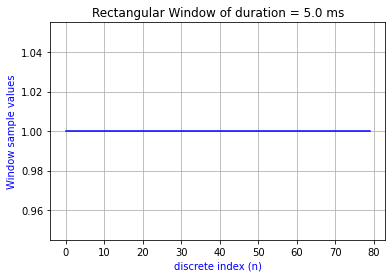

In [761]:
winDuration = 5e-3;                                                           
rectWin = createRectWindow(winDuration,sampFreq);                             
fig = plt.figure();
plt.title('Rectangular Window of duration = ' + str(winDuration*1e3) + ' ms');                 
plt.plot(range(int(sampFreq*winDuration)), rectWin[:], 'b');                     
plt.ylabel('Window sample values', color='b');                                # set the y axis label 
plt.xlabel('discrete index (n)',color='b');                                   # set the discrete time axis label
plt.grid();                                                                   # display the grid of the plot 
plt.axis('tight');                                                            # sets limits just large enough to show all data
plt.show();

In [762]:
def createHammingWindow(duration,sampFreq):
  numSamples = duration*sampFreq;                                 # number of window samples = duration * sampling rate
  hammingWin = np.zeros(int(numSamples),dtype=np.float_);         # declare a hamming window
  for i in range(int(numSamples)):
    hammingWin[i] = 0.54-0.46*np.cos(2*np.pi*i/int(numSamples));  # creates a Hamming Window using this equation
  return hammingWin                                               # return the created hamming Window

**Important points:**

1) The above function createhammingWindow is used to create a Hamming window of given time duration at a given sampling rate using the expression given as: 

w[n] = 0.54 - 0.46 cos(2.pi.n/N) for a window of length L = N.

2) This window will be used in further program to obtain a DFT of synthesized voewl lying in the window duration.

3) Plot of the Hamming window of duration 5 ms (having 80 samples) is shown in the below code cell.

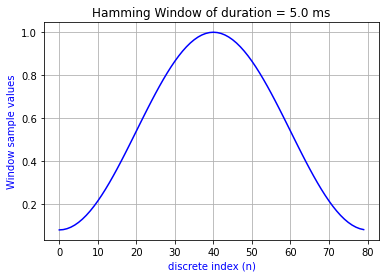

In [763]:
hammingWindow = createHammingWindow(winDuration,sampFreq);                    # Call the createhammingWindow function to create a Hamming window of given duration
fig = plt.figure();
plt.title('Hamming Window of duration = ' + str(winDuration*1e3) + ' ms');    # title of the plot
plt.plot(range(int(sampFreq*winDuration)), hammingWindow[:], 'b');            # Plot only the 5 pitch periods    
plt.ylabel('Window sample values', color='b');                                # set the y axis label 
plt.xlabel('discrete index (n)',color='b');                                   # set the discrete time axis label
plt.grid();                                                                   # display the grid of the plot 
plt.axis('tight');                                                            # sets limits just large enough to show all data
plt.show();

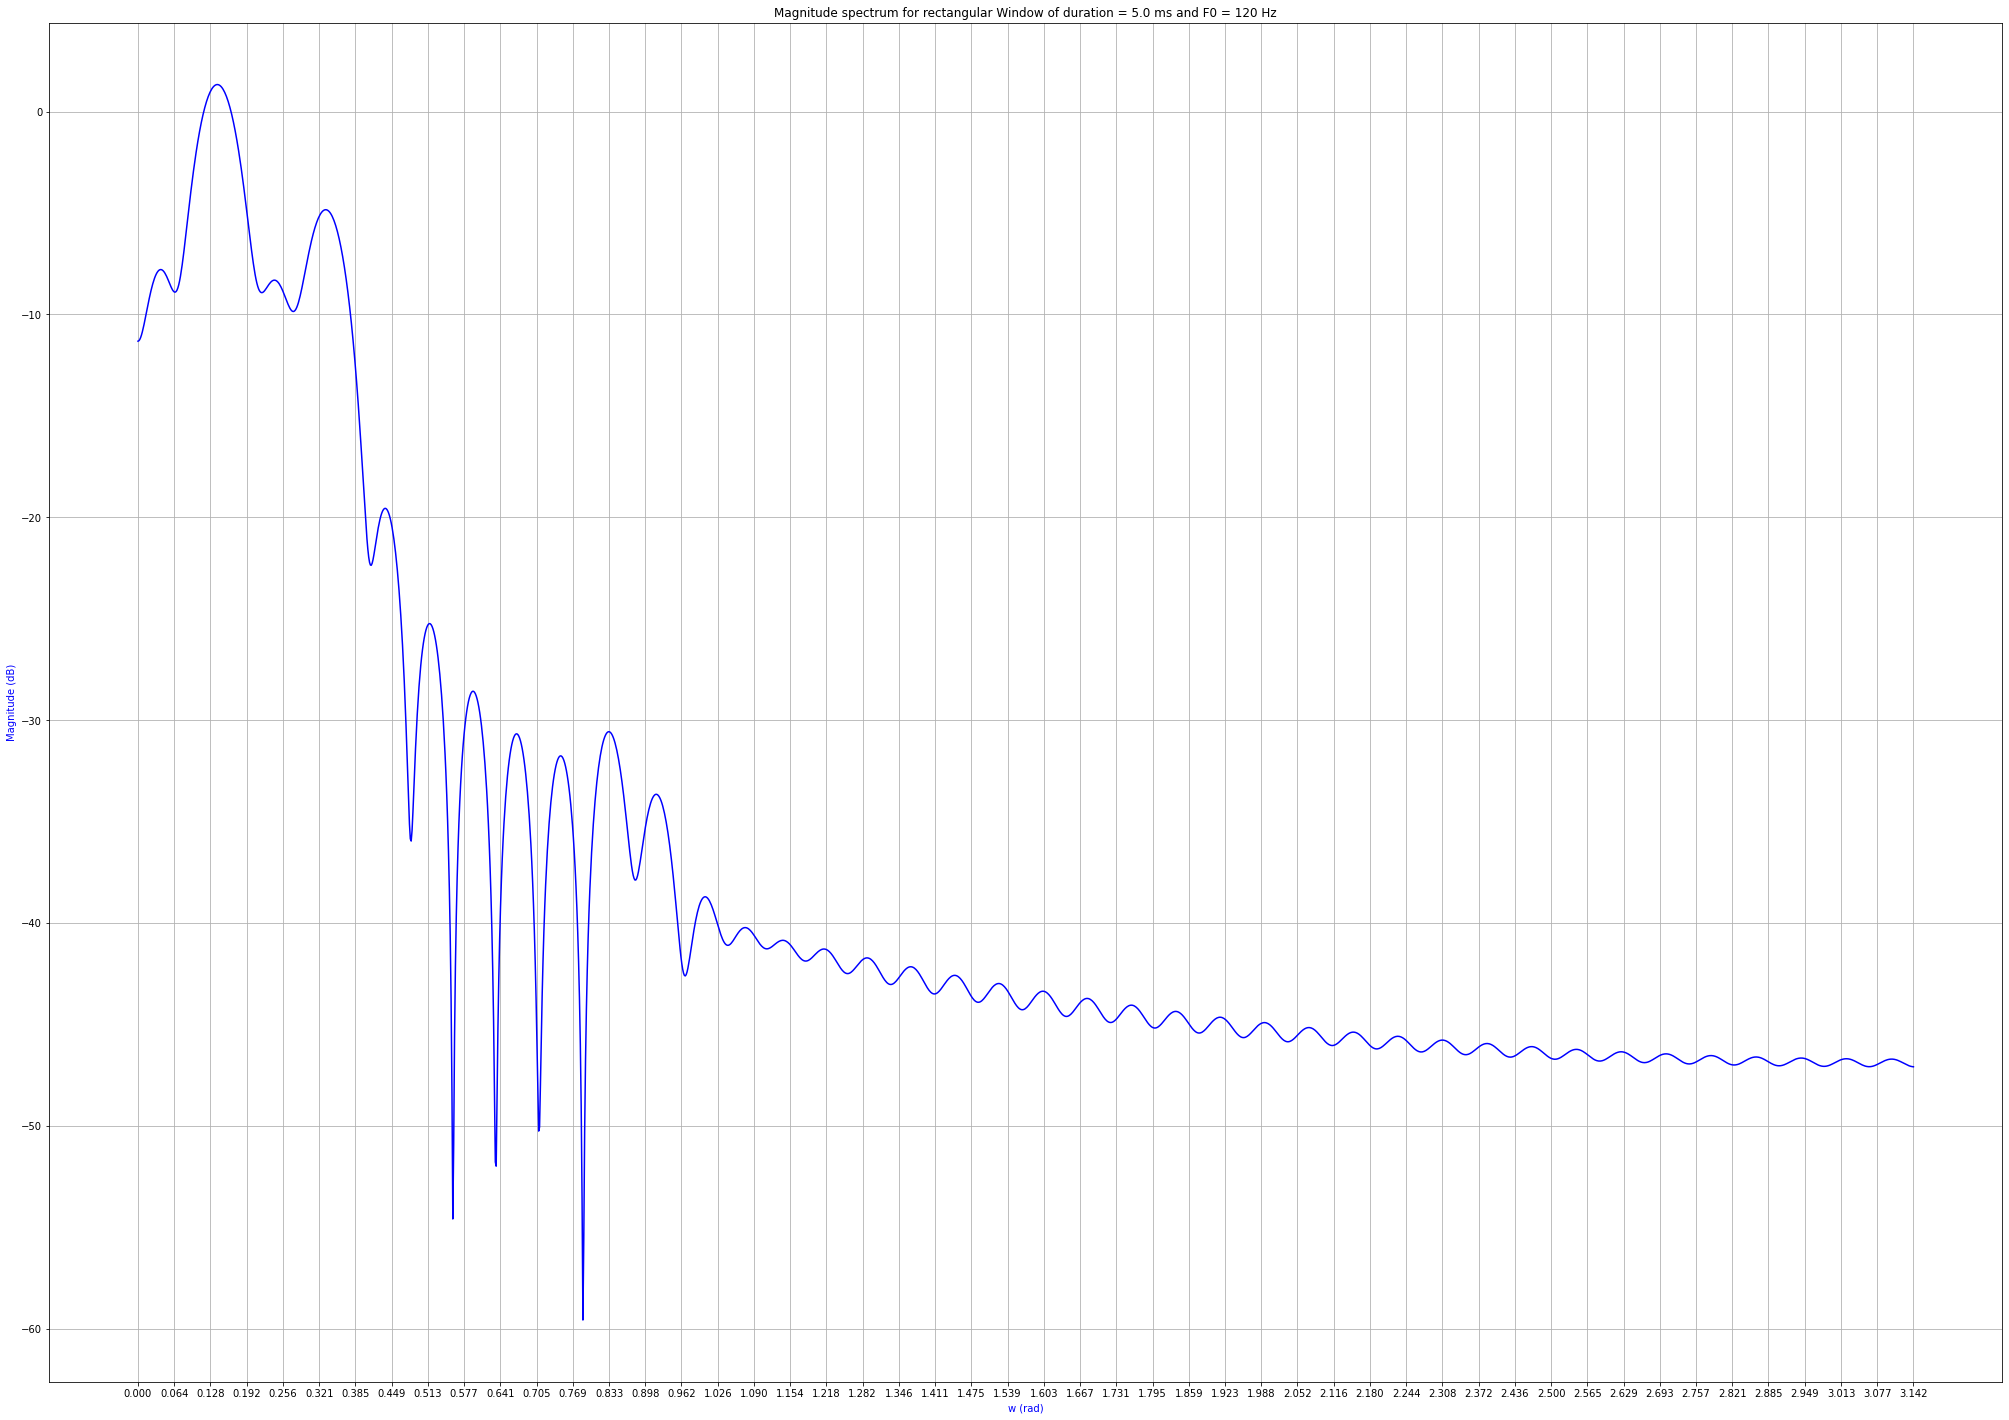

In [764]:
'''
As given in assignment statement we will use the waveform segment near the center of synthesized vowel 
'''
# Here we multiply the synthesized /u/ signal with the window signal by taking element wise multiplication
windowedSignal = np.multiply(rectWin,outputData_F3[int(sampFreq/F0):int(sampFreq/F0) + int(winDuration*sampFreq)]); 
dft_len = 1024*4;                                                # The DFT was computed at 1024 points distributed over 2*pi interval
windowedSignal_dft = np.fft.fft(windowedSignal, n=dft_len, norm='forward');    # Find the dft of windowed signal at specified number of dft points
mag = 20*np.log10(np.abs(windowedSignal_dft));                 # Find out the magnitude of the computed DFT 

fig = plt.figure(figsize=(35, 25));
plt.title('Magnitude spectrum for rectangular Window of duration = ' + str(winDuration*1e3) + ' ms and F0 = ' + str(F0) + ' Hz'); # title of the plot
plt.plot(np.linspace(0,np.pi,int(dft_len/2)), mag[0:int(dft_len/2)], color = 'b');      # Plot only the 5 pitch periods    
plt.xticks(np.linspace(0, np.pi, 50, endpoint=True));
plt.ylabel('Magnitude (dB)', color='b');                                   # set the y axis label 
plt.xlabel('w (rad)',color='b');                                           # set the discrete time axis label
plt.grid();                                                                # display the grid of the plot 
plt.axis('tight');                                                         # sets limits just large enough to show all data
plt.show();

**DFT magnitude spectrum for F0 = 120 Hz; Window = 'Rectangular'; Window duration = 5 ms :**

1) First the window was applied on the synthesized vowel /u/ and then the 4096 point DFT of that signal was computed.

2) The magnitude spectrum for 0 to pi interval on w-axis is plotted in the above figure.

3) Since the window duration is small, it represents the Wideband Analysis, i.e. the main lobe of window in frequency domain will be wide. Due to this we will not be able to visualize the individual pitch harmonics but we can see the hidden envelope i.e. the formants belonging to vowel /u/. 

In [765]:
def findFormant(sampFrequency, numDFTpoints, w1, w2, DFTArray):
  ind1 = int((numDFTpoints-1)*w1/(2*np.pi));                           # Find the index corresponding to w1
  ind2 = int((numDFTpoints-1)*w2/(2*np.pi));                           # Find the index corresponding to w2
  maxInd = np.argmax(DFTArray[ind1:ind2]);                             # Find the index corresponding to maximum value present in DFT array between w1 and w2
  formantFreq = int(sampFrequency*(maxInd+ind1)/numDFTpoints);         # find the formant frequency corresponding to that index
  return formantFreq

**Important:**

1) The function findFormant takes sampling frequency, number of DFT points, w1, w2 and DFT output.

2) Then we find out the index in the DFT array corresponding to that w1 and w2.

3) Maximum values of DFT magnitude and corresponding array index are found using argmax function.

4) Then formant frequency corresponding to that index is found out and returned.

5) I have taken 1024 point DFT which means 2.pi/1024 resolution on w axis.Which means sampling frequency/1024 resolution in frquency. This is equal to: 16000/4096 = 3.90 Hz resolution per DFT point.

6) argmax function takes the array's first index as zero so we need to add ind1 to the index correponding to the index of maximum value returned by argmax function.



In [766]:
'''
F1, F2 AND F3 CALCULATION FOR RECTANGULAR WINDOW FOR WINDOW DURATION = 5 ms 
'''
print("The following are the formant calculations and corresponding errors for rectangular Window: ");
F1 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.110, w2=0.192,DFTArray=mag);
print("Predicted Formant F1 = " + str(F1) + " Hz");
print("Error in F1 = " + str(np.abs(F1-300)) + " Hz");

F2 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.321, w2=0.385,DFTArray=mag);
print("Predicted Formant F2 = " + str(F2) + " Hz");
print("Error in F2 = " + str(np.abs(F2-870)) + " Hz");

F3 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.833, w2=0.898,DFTArray=mag);
print("Predicted Formant F3 = " + str(F3) + " Hz");
print("Error in F3 = " + str(np.abs(F3-2240)) + " Hz");

F01 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.577, w2=0.641,DFTArray=mag);
F02 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.641, w2=0.705,DFTArray=mag);
pitch_fund_Freq = np.abs(F01-F02);
print("Predicted Formant frequency F0 = " + str(pitch_fund_Freq) + ' Hz');
print("Error in F0 = " + str(np.abs(pitch_fund_Freq-120)) + ' Hz');

The following are the formant calculations and corresponding errors for rectangular Window: 
Predicted Formant F1 = 355 Hz
Error in F1 = 55 Hz
Predicted Formant F2 = 843 Hz
Error in F2 = 27 Hz
Predicted Formant F3 = 2121 Hz
Error in F3 = 119 Hz
Predicted Formant frequency F0 = 196 Hz
Error in F0 = 76 Hz


**Important:**

1) From the above frequency magnitude graph against w, in order to find out the F1 formant frequency, we pass the w1 and w2 values between which the F1 peak occurs.

2) The findFormant() function returns the values as printed in the above code cell.

3) Absolute error is also displayed for each formant frequency estimated from magnitude spectrum.

4) As it can be observed the error in estimating each formant frequency value is slightly on the higher side as compared to same error for Hamming window calculated in below code cell.

5) The error in calculating the F0 is high this is because the Window duration is 5 ms which gives a large main lobe width and we loose frequency domain resolution and window is not able to catch harmonics of pitch.

6) I have taken two adjacent peaks between w1 = 0.577 rad, w2 = 0.641 rad and w1 = 0.641 rad, w2 = 0.705 rad. F01 and F02 are calculated as the frequencies at which peak occurs in each of these two ranges of w values and the difference between these two peak values is (F01-F02) calculated to obtain the F0.

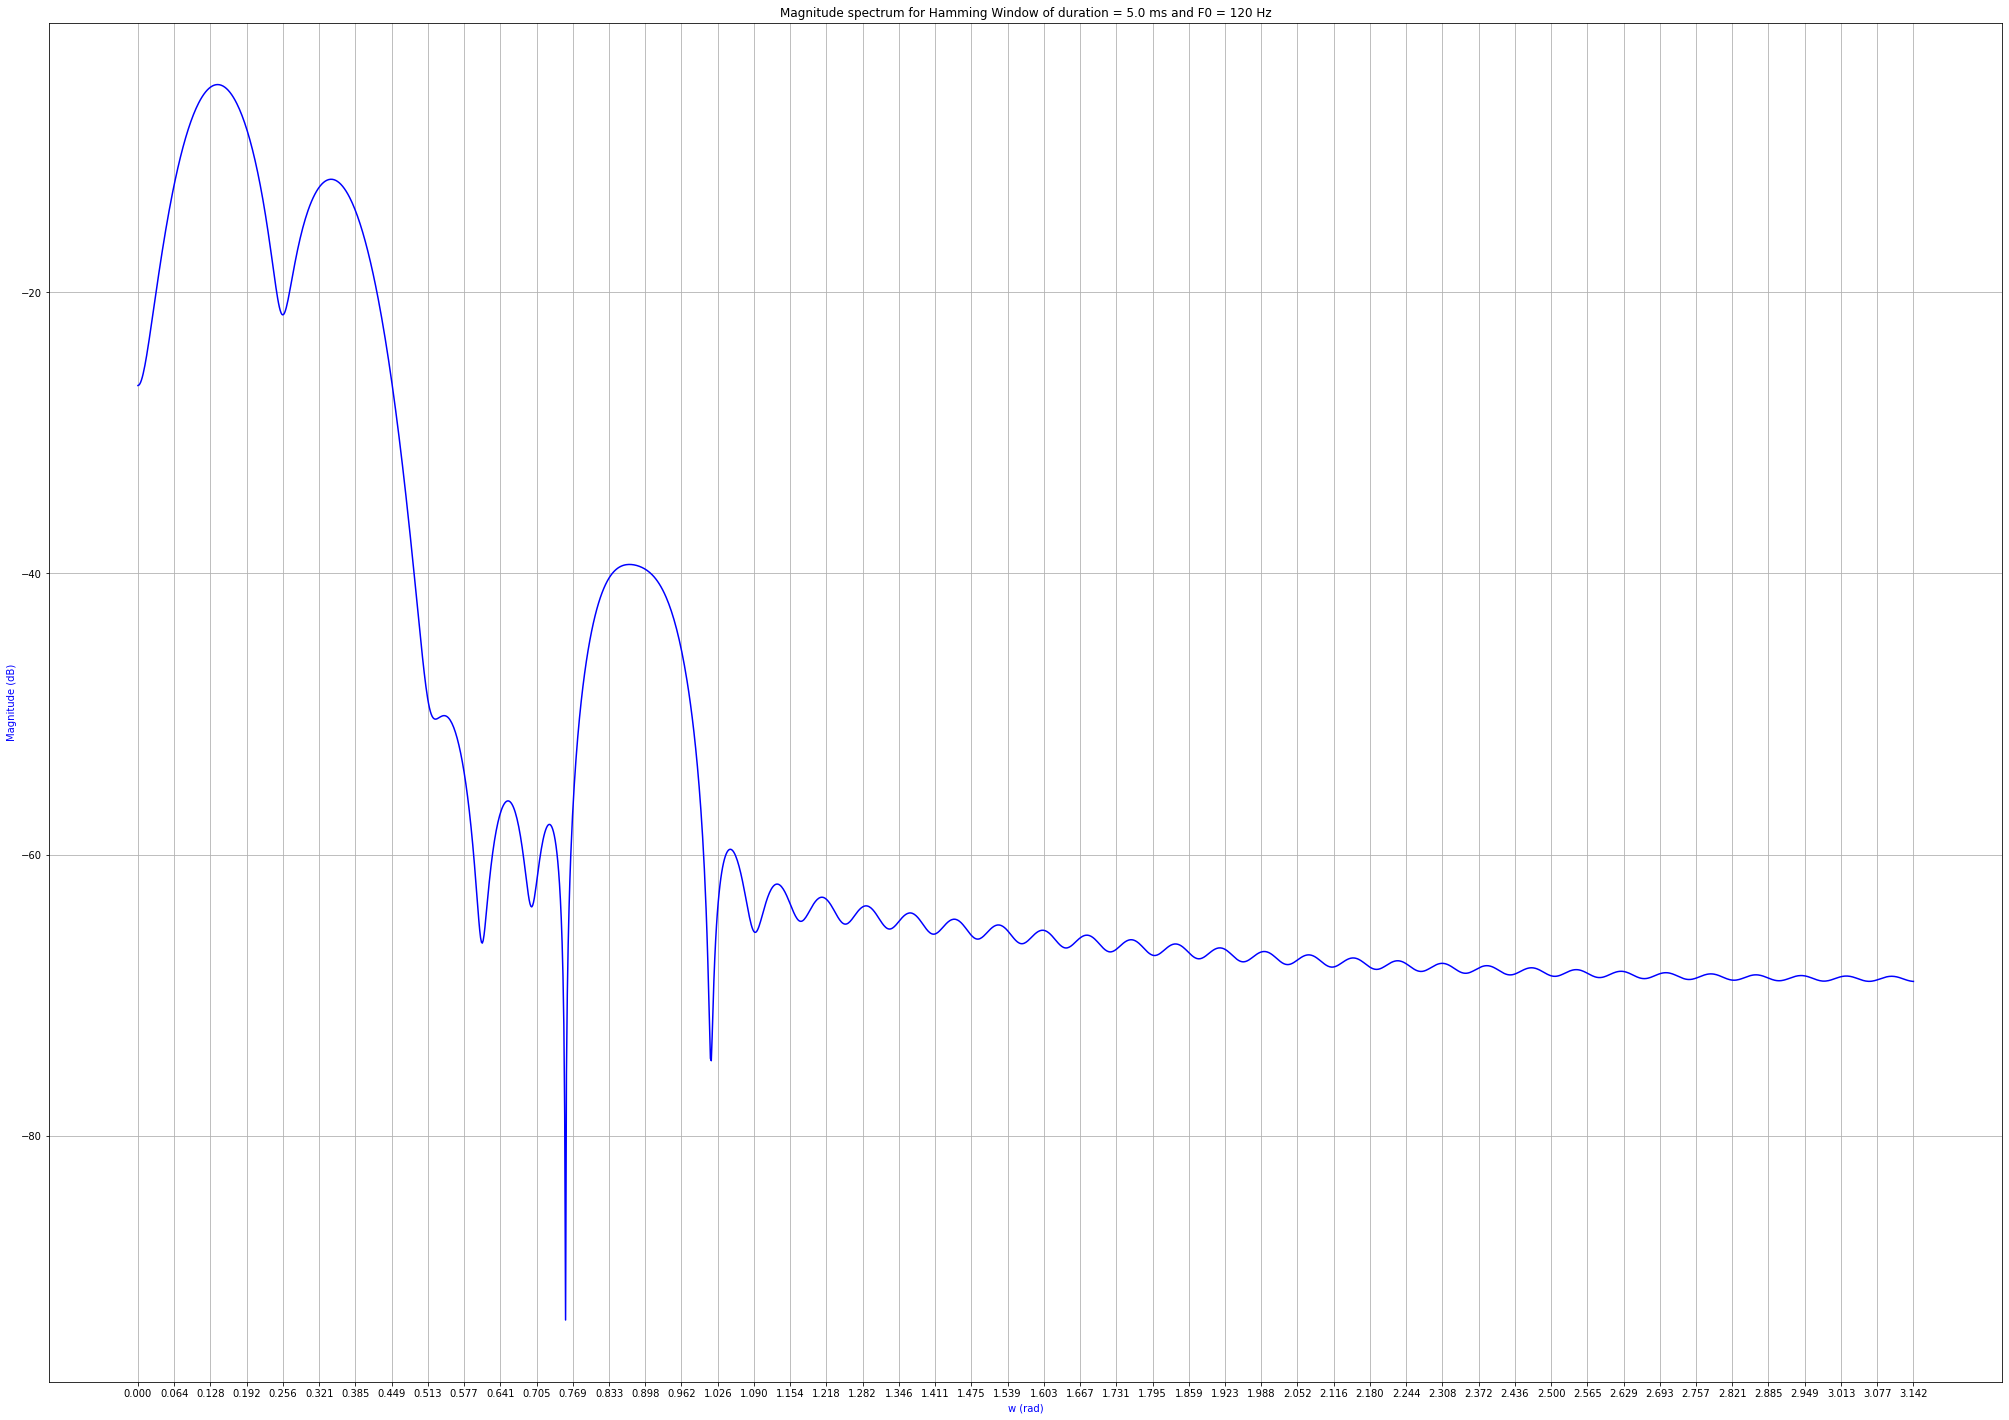

In [767]:
# Here we multiply the synthesized /u/ signal with the window signal by taking element wise multiplication
windowedSignal = np.multiply(hammingWindow,outputData_F3[int(sampFreq/F0):int(sampFreq/F0) + int(winDuration*sampFreq)]); 
windowedSignal_dft = np.fft.fft(windowedSignal, n=dft_len, norm= 'forward');    # Find the dft of windowed signal at specified number of dft points
mag = 20*np.log10(np.abs(windowedSignal_dft));                                  # Find out the magnitude of the computed DFT 
fig = plt.figure(figsize=(35, 25));
plt.title('Magnitude spectrum for Hamming Window of duration = ' + str(winDuration*1e3) + ' ms and F0 = ' + str(F0) + ' Hz'); # title of the plot
plt.plot(np.linspace(0,np.pi,int(dft_len/2)), mag[0:int(dft_len/2)], color = 'b');      # Plot only the 5 pitch periods    
plt.xticks(np.linspace(0, np.pi, 50, endpoint=True));
plt.ylabel('Magnitude (dB)', color='b');                                   # set the y axis label 
plt.xlabel('w (rad)',color='b');                                           # set the discrete time axis label
plt.grid();                                                                # display the grid of the plot 
plt.axis('tight');                                                         # sets limits just large enough to show all data
plt.show();

In [768]:
'''
F1, F2 AND F3 CALCULATION FOR HAMMING WINDOW FOR WINDOW DURATION = 5 ms
'''
print("The following are the formant calculations and corresponding errors for Hamming Window: ");
F1 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.1, w2=0.192,DFTArray=mag);
print("Predicted Formant F1 = " + str(F1) + " Hz");
print("Error in F1 = " + str(np.abs(F1-300)) + " Hz");

F2 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.321, w2=0.385,DFTArray=mag);
print("Predicted Formant F2 = " + str(F2) + " Hz");
print("Error in F2 = " + str(np.abs(F2-870)) + " Hz");

F3 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.833, w2=0.898,DFTArray=mag);
print("Predicted Formant F3 = " + str(F3) + " Hz");
print("Error in F3 = " + str(np.abs(F3-2240)) + " Hz");

F01 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=1.026, w2=1.090,DFTArray=mag);
F02 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=1.090, w2=1.154,DFTArray=mag);
pitch_fund_Freq = np.abs(F01-F02);
print("Predicted Frequency F0 = " + str(pitch_fund_Freq) + ' Hz');
print("Error in F0 = " + str(np.abs(pitch_fund_Freq-120)) + ' Hz');

The following are the formant calculations and corresponding errors for Hamming Window: 
Predicted Formant F1 = 359 Hz
Error in F1 = 59 Hz
Predicted Formant F2 = 871 Hz
Error in F2 = 1 Hz
Predicted Formant F3 = 2214 Hz
Error in F3 = 26 Hz
Predicted Frequency F0 = 211 Hz
Error in F0 = 91 Hz


**Observations and comparison with rectangular window results:**

1) For Hamming window case we get a very clear frequency magnitude spectrum as compared to rectangular window because Hamming window has fastly decaying side lobes due to its tapered shape.

2) Again due to large main lobe width due to small window duration we are not able to correctly find out the F0 frequency value whereas, the errors in F1, F2 and F3 calculations are small as compared to same values of F1, F2 and F3 calculated using rectangular window. 

3) Error in calculation of F1, F2 and F3 has reduced here as compared to rectangilar window.

4) To calculate F0, I used two peaks which occur between w = (1.026,1.090) and w = (1.090,1.154). The frequency in Hz corresponding to these two peaks was found out and the difference between them is = 211 Hz which is 90 Hz away from F0 = 120 Hz value.

5) A large error occurs in F0 calculation because window duration of 5 ms looses on frequency resolution but has an excellent time resolution.

##Analysis for Rectangular and Hamming windows for duration = 10 ms and F0 = 120 Hz##

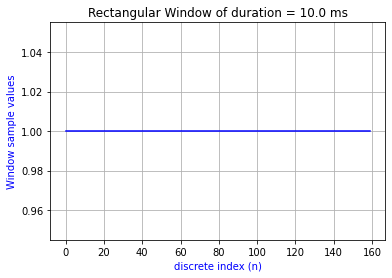

In [769]:
winDuration = 10e-3;                                                          # Create a rectangular window of given duration
rectWin = createRectWindow(winDuration,sampFreq);                             # Call the createRectWindow function to create a rectangular window
fig = plt.figure();
plt.title('Rectangular Window of duration = ' + str(winDuration*1e3) + ' ms');# title of the plot
plt.plot(range(int(sampFreq*winDuration)), rectWin[:], 'b');                  # Plot only the 5 pitch periods    
plt.ylabel('Window sample values', color='b');                                # set the y axis label 
plt.xlabel('discrete index (n)',color='b');                                   # set the discrete time axis label
plt.grid();                                                                   # display the grid of the plot 
plt.axis('tight');                                                            # sets limits just large enough to show all data
plt.show();

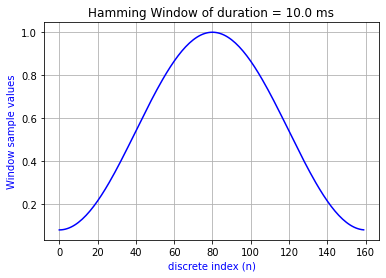

In [770]:
hammingWindow = createHammingWindow(winDuration,sampFreq);                    # Call the createhammingWindow function to create a Hamming window of given duration
fig = plt.figure();
plt.title('Hamming Window of duration = ' + str(winDuration*1e3) + ' ms');    # title of the plot
plt.plot(range(int(sampFreq*winDuration)), hammingWindow[:], 'b');            # Plot only the 5 pitch periods    
plt.ylabel('Window sample values', color='b');                                # set the y axis label 
plt.xlabel('discrete index (n)',color='b');                                   # set the discrete time axis label
plt.grid();                                                                   # display the grid of the plot 
plt.axis('tight');                                                            # sets limits just large enough to show all data
plt.show();

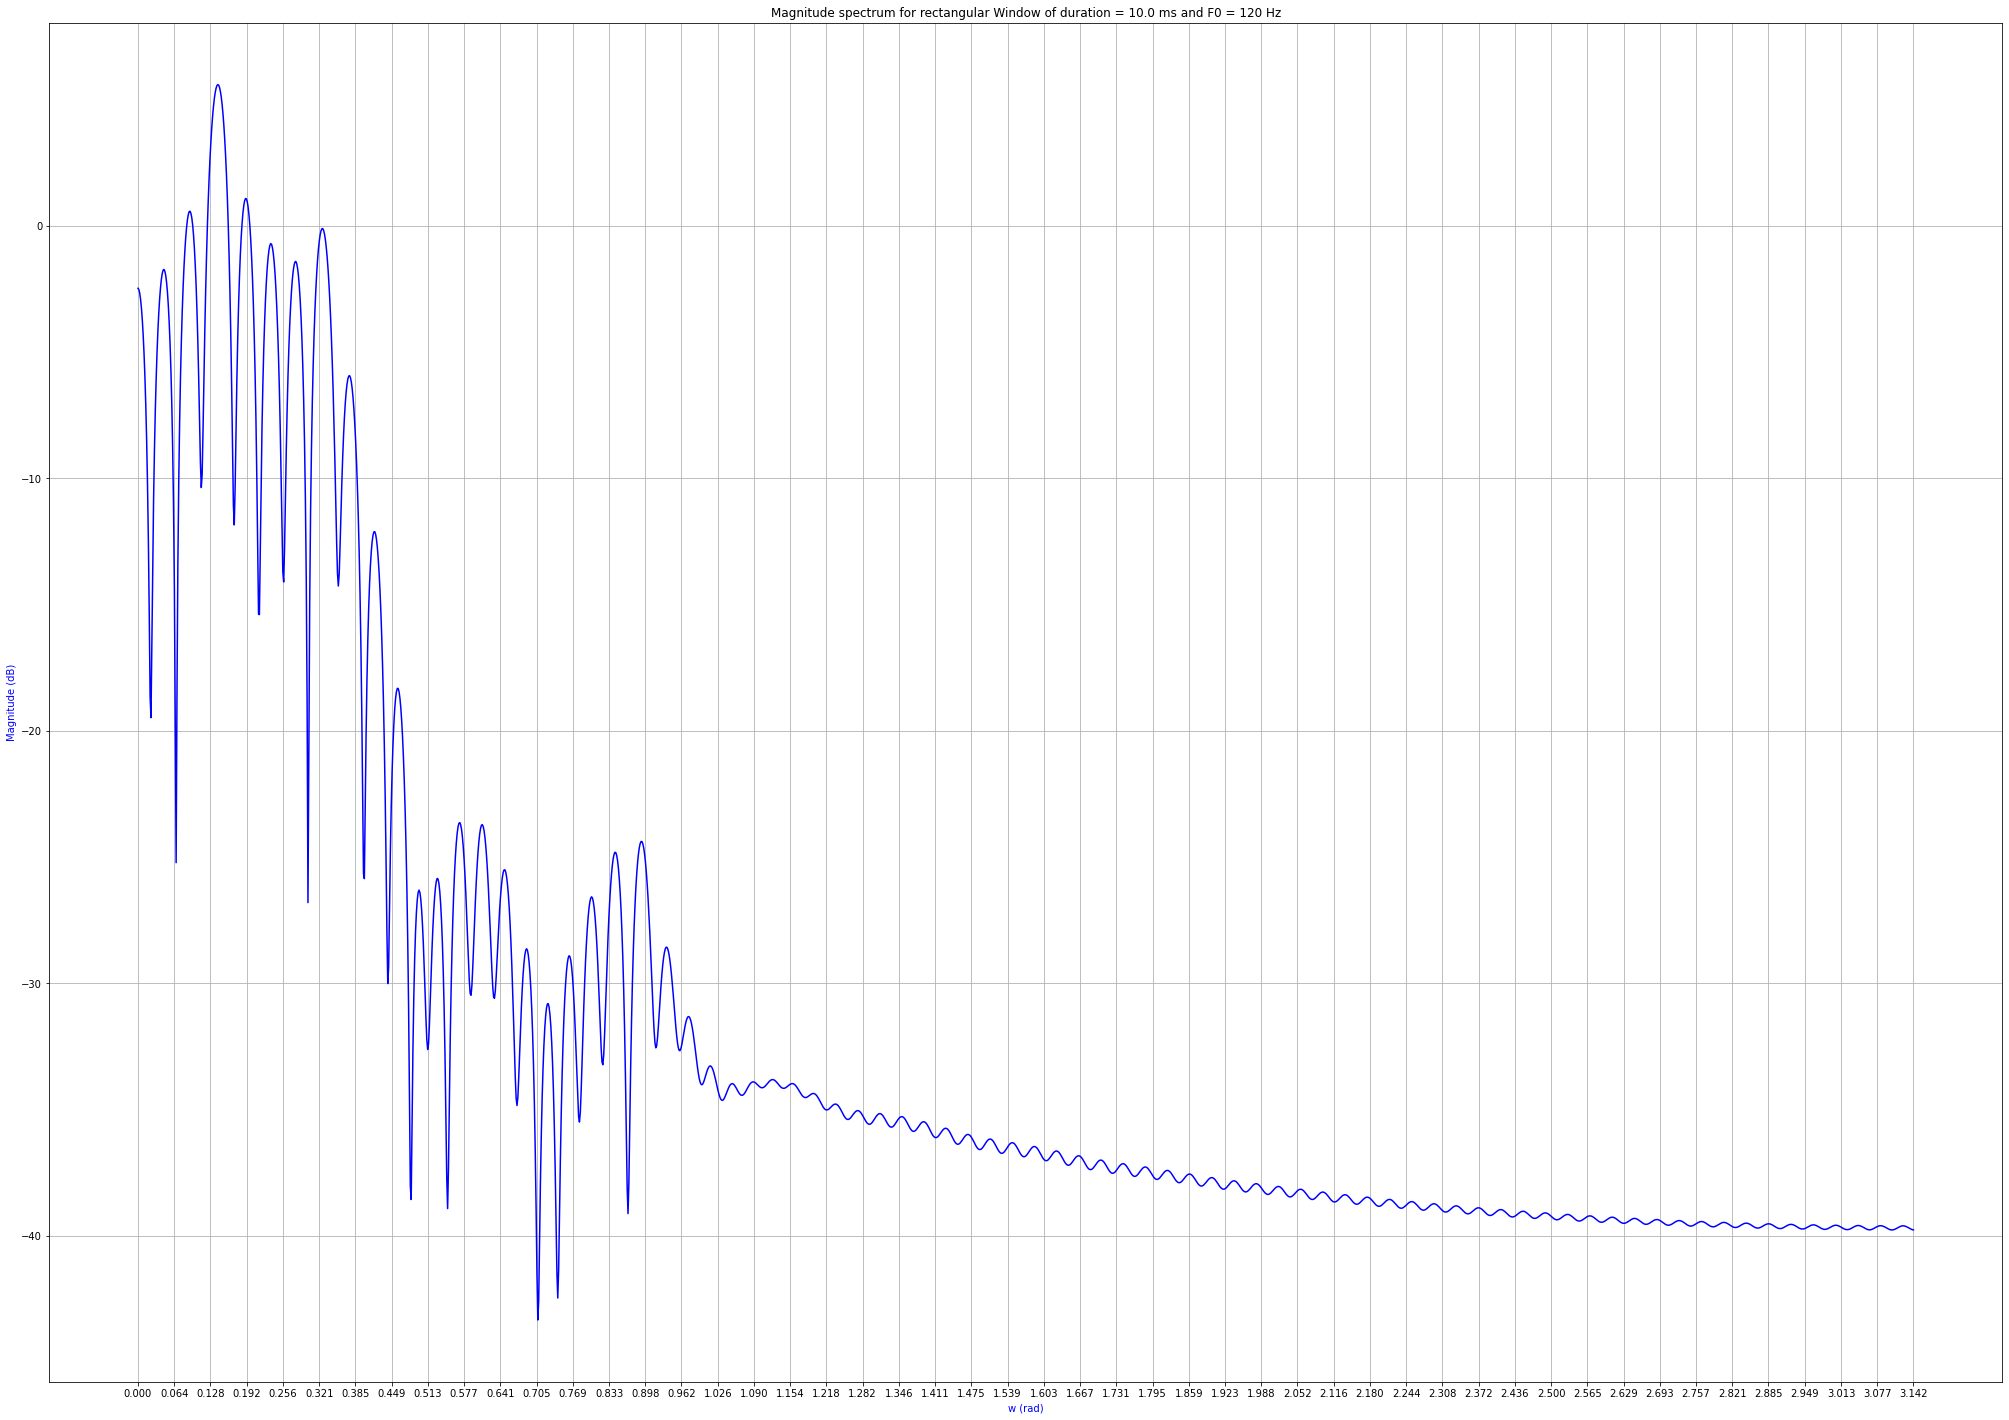

In [771]:
'''
As given in assignment statement we will use the waveform segment near the center of synthesized vowel 
'''
# Here we multiply the synthesized /u/ signal with the window signal by taking element wise multiplication
windowedSignal = np.multiply(rectWin,outputData_F3[int(sampFreq/F0):int(sampFreq/F0) + int(winDuration*sampFreq)]); 
windowedSignal_dft = np.fft.fft(windowedSignal, n=dft_len, norm='forward');            # Find the dft of windowed signal at specified number of dft points
mag = 20*np.log10(np.abs(windowedSignal_dft));                 # Find out the magnitude of the computed DFT 

fig = plt.figure(figsize=(35, 25));
plt.title('Magnitude spectrum for rectangular Window of duration = ' + str(winDuration*1e3) + ' ms and F0 = ' + str(F0) + ' Hz'); # title of the plot
plt.plot(np.linspace(0,np.pi,int(dft_len/2)), mag[0:int(dft_len/2)], color = 'b');      # Plot only the 5 pitch periods    
plt.xticks(np.linspace(0, np.pi, 50, endpoint=True));
plt.ylabel('Magnitude (dB)', color='b');                                   # set the y axis label 
plt.xlabel('w (rad)',color='b');                                           # set the discrete time axis label
plt.grid();                                                                # display the grid of the plot 
plt.axis('tight');                                                         # sets limits just large enough to show all data
plt.show();

**DFT magnitude spectrum for F0 = 120 Hz; Window = 'Rectangular'; Window duration = 10 ms :**

1) Since the window duration has increased, the main lobe of window in frequency domain will be less wider as that in 5 ms case. 

2) Now we are able to see individual harmonics more clearly than previous case. But the drawback is that now the hidden envelope and F1, F2 and F3 cannot be clearly pointed out as easily as in 5 ms case.

3) So the F1, F2 and F3 calculation has to be carried out by considering where the peak values occur in the spectrum.

In [772]:
'''
F1, F2 AND F3 CALCULATION FOR RECTANGULAR WINDOW FOR WINDOW DURATION = 10 ms 
'''
print("The following are the formant calculations and corresponding errors for rectangular Window: ");
F1 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.128, w2=0.192,DFTArray=mag);
print("Predicted Formant F1 = " + str(F1) + " Hz");
print("Error in F1 = " + str(np.abs(F1-300)) + " Hz");

F2 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.321, w2=0.385,DFTArray=mag);
print("Predicted Formant F2 = " + str(F2) + " Hz");
print("Error in F2 = " + str(np.abs(F2-870)) + " Hz");

F3 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.833, w2=0.962,DFTArray=mag);
print("Predicted Formant F3 = " + str(F3) + " Hz");
print("Error in F3 = " + str(np.abs(F3-2240)) + " Hz");

F01 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.769, w2=0.833,DFTArray=mag);
F02 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.833, w2=0.866,DFTArray=mag);
pitch_fund_Freq = np.abs(F01-F02);
print("Predicted Frequency F0 = " + str(pitch_fund_Freq) + ' Hz');
print("Error in F0 = " + str(np.abs(pitch_fund_Freq-120)) + ' Hz');

The following are the formant calculations and corresponding errors for rectangular Window: 
Predicted Formant F1 = 359 Hz
Error in F1 = 59 Hz
Predicted Formant F2 = 832 Hz
Error in F2 = 38 Hz
Predicted Formant F3 = 2265 Hz
Error in F3 = 25 Hz
Predicted Frequency F0 = 106 Hz
Error in F0 = 14 Hz


**Observations for 10 ms Rectangular Window:**

1) Due to an increase in the Window duration, the main lobe of rectangular window has become narrower as compared to 5 ms case. The error in calculation of all the frequencies has reduced.

2) In this case, the individual harmonics of F0 are clearly visible and hence the calculation of F0 frequency is having very less error as compared to previous 5 ms case.

3) For calculating F0 I took two ranges of w values (0.769,0.833) and (0.833,0.866). Frequency in Hz corresponding to peaks in each of these ranges were found and difference between them gives the F0 value.

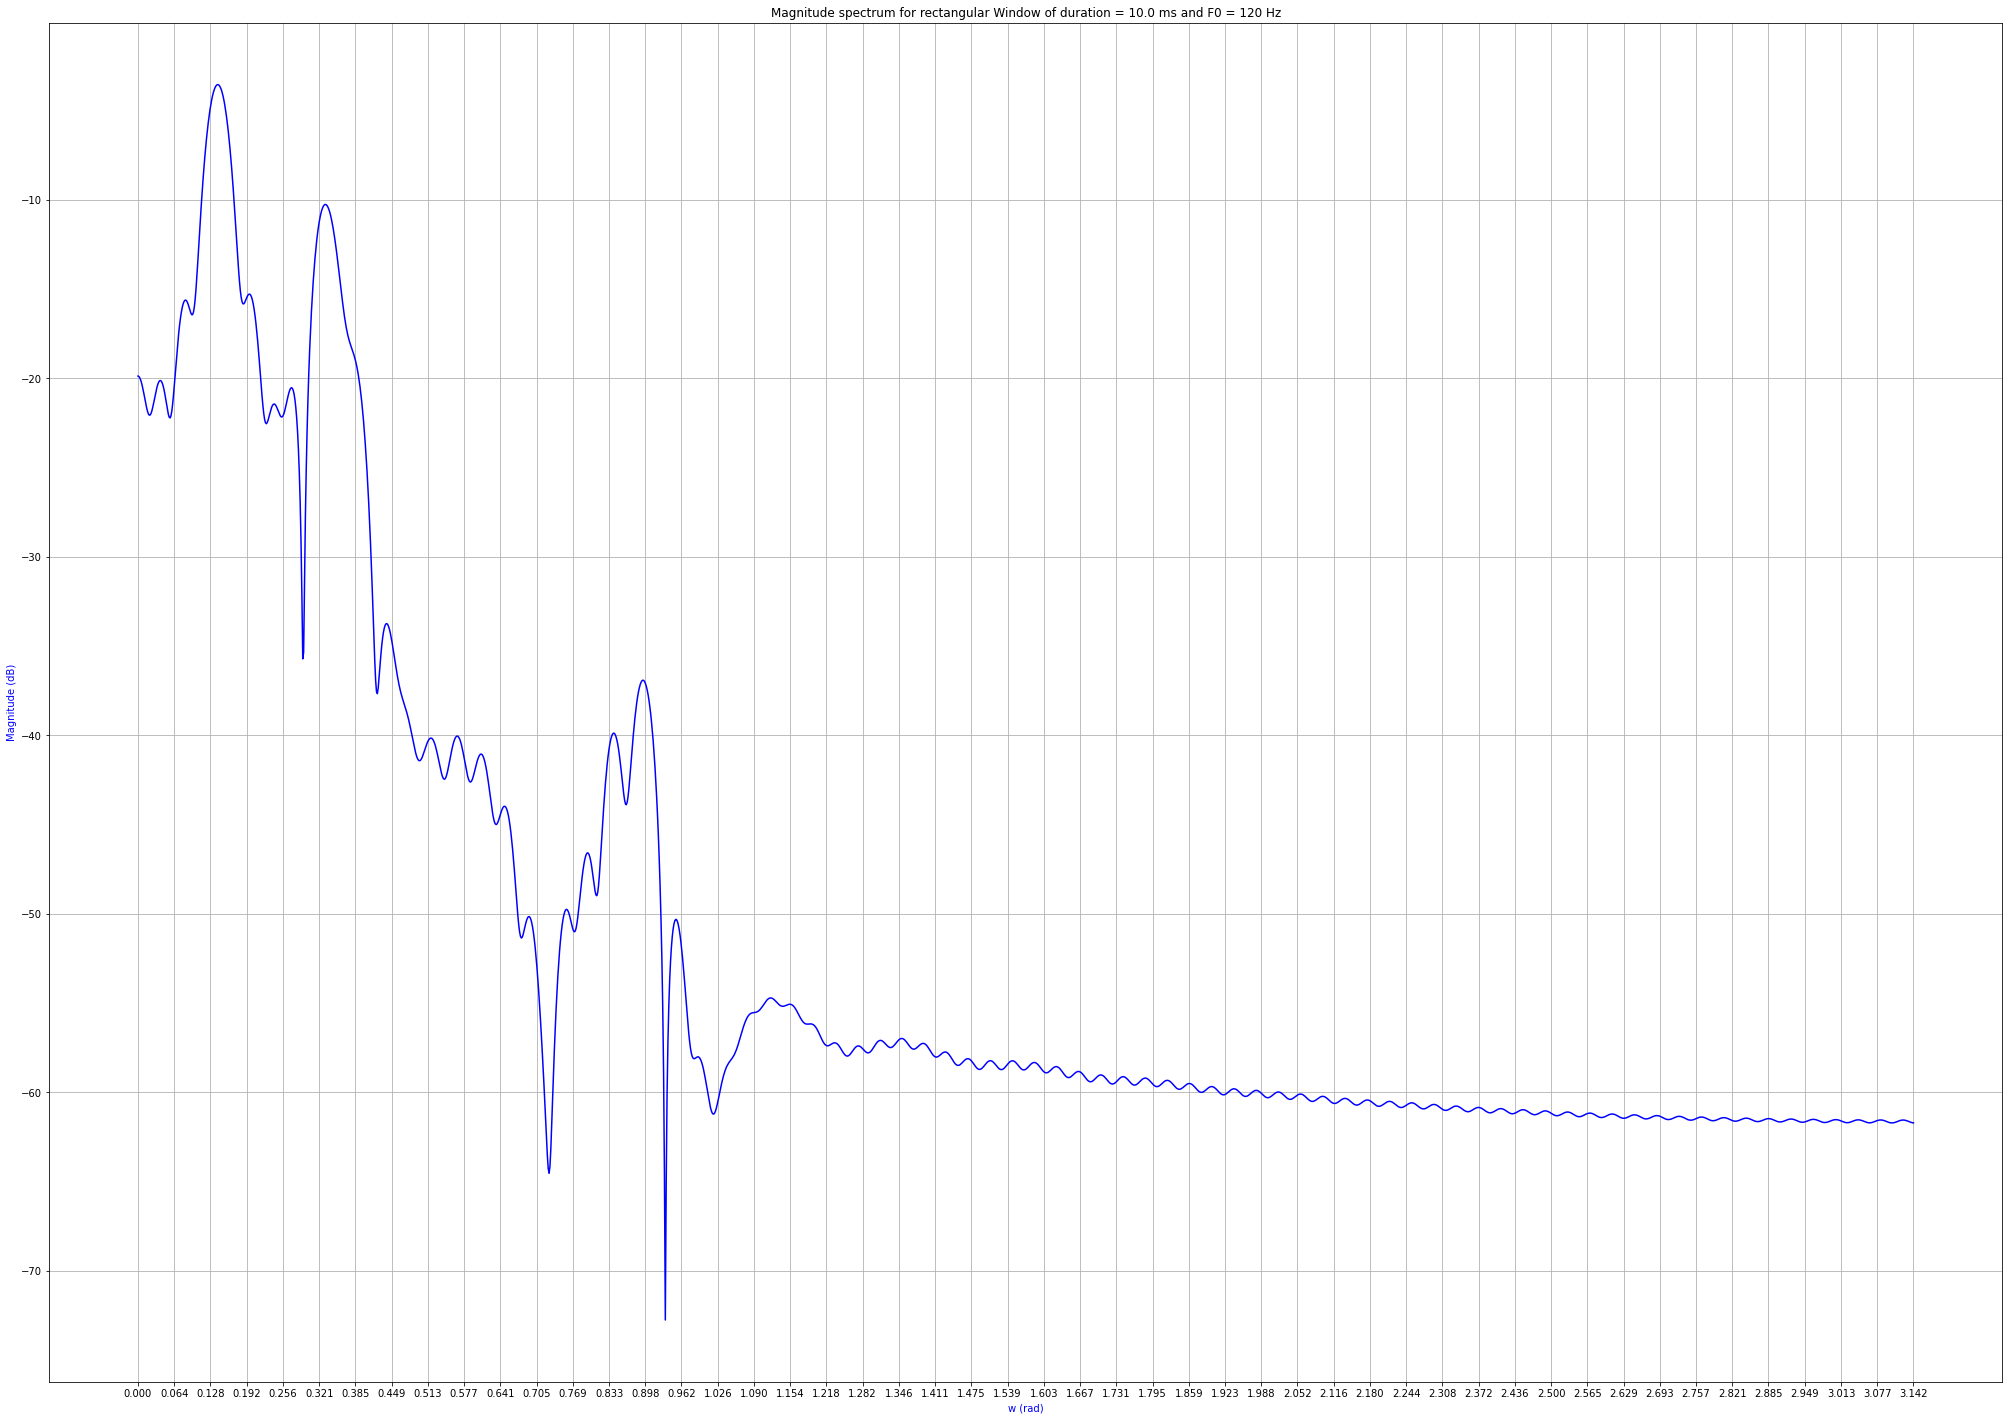

In [773]:
# Here we multiply the synthesized /u/ signal with the window signal by taking element wise multiplication
windowedSignal = np.multiply(hammingWindow,outputData_F3[int(sampFreq/F0):int(sampFreq/F0) + int(winDuration*sampFreq)]); 
windowedSignal_dft = np.fft.fft(windowedSignal, n=dft_len, norm = 'forward');    # Find the dft of windowed signal at specified number of dft points
mag = 20*np.log10(np.abs(windowedSignal_dft));                 # Find out the magnitude of the computed DFT 

fig = plt.figure(figsize=(35, 25));
plt.title('Magnitude spectrum for rectangular Window of duration = ' + str(winDuration*1e3) + ' ms and F0 = ' + str(F0) + ' Hz'); # title of the plot
plt.plot(np.linspace(0,np.pi,int(dft_len/2)), mag[0:int(dft_len/2)], color = 'b');      # Plot only the 5 pitch periods    
plt.xticks(np.linspace(0, np.pi, 50, endpoint=True));
plt.ylabel('Magnitude (dB)', color='b');                                   # set the y axis label 
plt.xlabel('w (rad)',color='b');                                           # set the discrete time axis label
plt.grid();                                                                # display the grid of the plot 
plt.axis('tight');                                                         # sets limits just large enough to show all data
plt.show();

In [774]:
'''
F1, F2 AND F3 CALCULATION FOR HAMMING WINDOW FOR WINDOW DURATION = 10 ms
'''
print("The following are the formant calculations and corresponding errors for Hamming Window: ");
F1 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.064, w2=0.192,DFTArray=mag);
print("Formant F1 = " + str(F1) + " Hz");
print("Error in F1 = " + str(np.abs(F1-300)) + " Hz");

F2 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.321, w2=0.385,DFTArray=mag);
print("Formant F2 = " + str(F2) + " Hz");
print("Error in F2 = " + str(np.abs(F2-870)) + " Hz");

F3 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.833, w2=0.898,DFTArray=mag);
print("Formant F3 = " + str(F3) + " Hz");
print("Error in F3 = " + str(np.abs(F3-2240)) + " Hz");

F01 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.577, w2=0.641,DFTArray=mag);
F02 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.641, w2=0.705,DFTArray=mag);
pitch_fund_Freq = np.abs(F01-F02);
print("Predicted Frequency F0 = " + str(pitch_fund_Freq) + ' Hz');
print("Error in F0 = " + str(np.abs(pitch_fund_Freq-120)) + ' Hz');

The following are the formant calculations and corresponding errors for Hamming Window: 
Formant F1 = 359 Hz
Error in F1 = 59 Hz
Formant F2 = 843 Hz
Error in F2 = 27 Hz
Formant F3 = 2273 Hz
Error in F3 = 33 Hz
Predicted Frequency F0 = 106 Hz
Error in F0 = 14 Hz


**Observations for 10 ms Hamming Window:**

1) Due to an increase in the Window duration, the main lobe of rectangular window has become narrower as compared to 5 ms case. The error in calculation of all the frequencies has reduced.

2) In this case, the individual harmonics of F0 are clearly visible and hence the calculation of F0 frequency is having very less error as compared to previous 5 ms case.

3) For calculating F0 I took two ranges of w values (0.577,0.641) and (0.641,0.705). Frequency in Hz corresponding to peaks in each of these ranges of w were found and difference between them gives the F0 value.

##Analysis for Rectangular and Hamming windows for duration = 20 ms and F0 = 120 Hz##

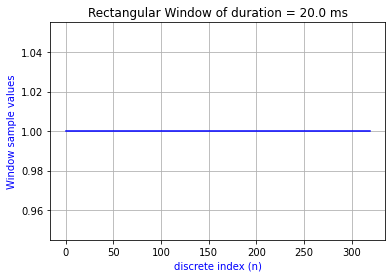

In [775]:
winDuration = 20e-3;                                                          # Create a rectangular window of given duration
rectWin = createRectWindow(winDuration,sampFreq);                             # Call the createRectWindow function to create a rectangular window
fig = plt.figure();
plt.title('Rectangular Window of duration = ' + str(winDuration*1e3) + ' ms');# title of the plot
plt.plot(range(int(sampFreq*winDuration)), rectWin[:], 'b');                  # Plot only the 5 pitch periods    
plt.ylabel('Window sample values', color='b');                                # set the y axis label 
plt.xlabel('discrete index (n)',color='b');                                   # set the discrete time axis label
plt.grid();                                                                   # display the grid of the plot 
plt.axis('tight');                                                            # sets limits just large enough to show all data
plt.show();

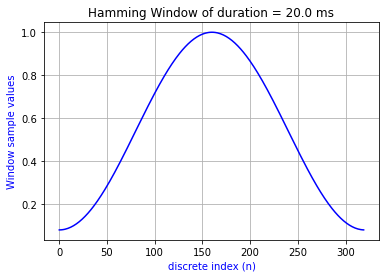

In [776]:
hammingWindow = createHammingWindow(winDuration,sampFreq);                    # Call the createhammingWindow function to create a Hamming window of given duration
fig = plt.figure();
plt.title('Hamming Window of duration = ' + str(winDuration*1e3) + ' ms');    # title of the plot
plt.plot(range(int(sampFreq*winDuration)), hammingWindow[:], 'b');            # Plot only the 5 pitch periods    
plt.ylabel('Window sample values', color='b');                                # set the y axis label 
plt.xlabel('discrete index (n)',color='b');                                   # set the discrete time axis label
plt.grid();                                                                   # display the grid of the plot 
plt.axis('tight');                                                            # sets limits just large enough to show all data
plt.show();

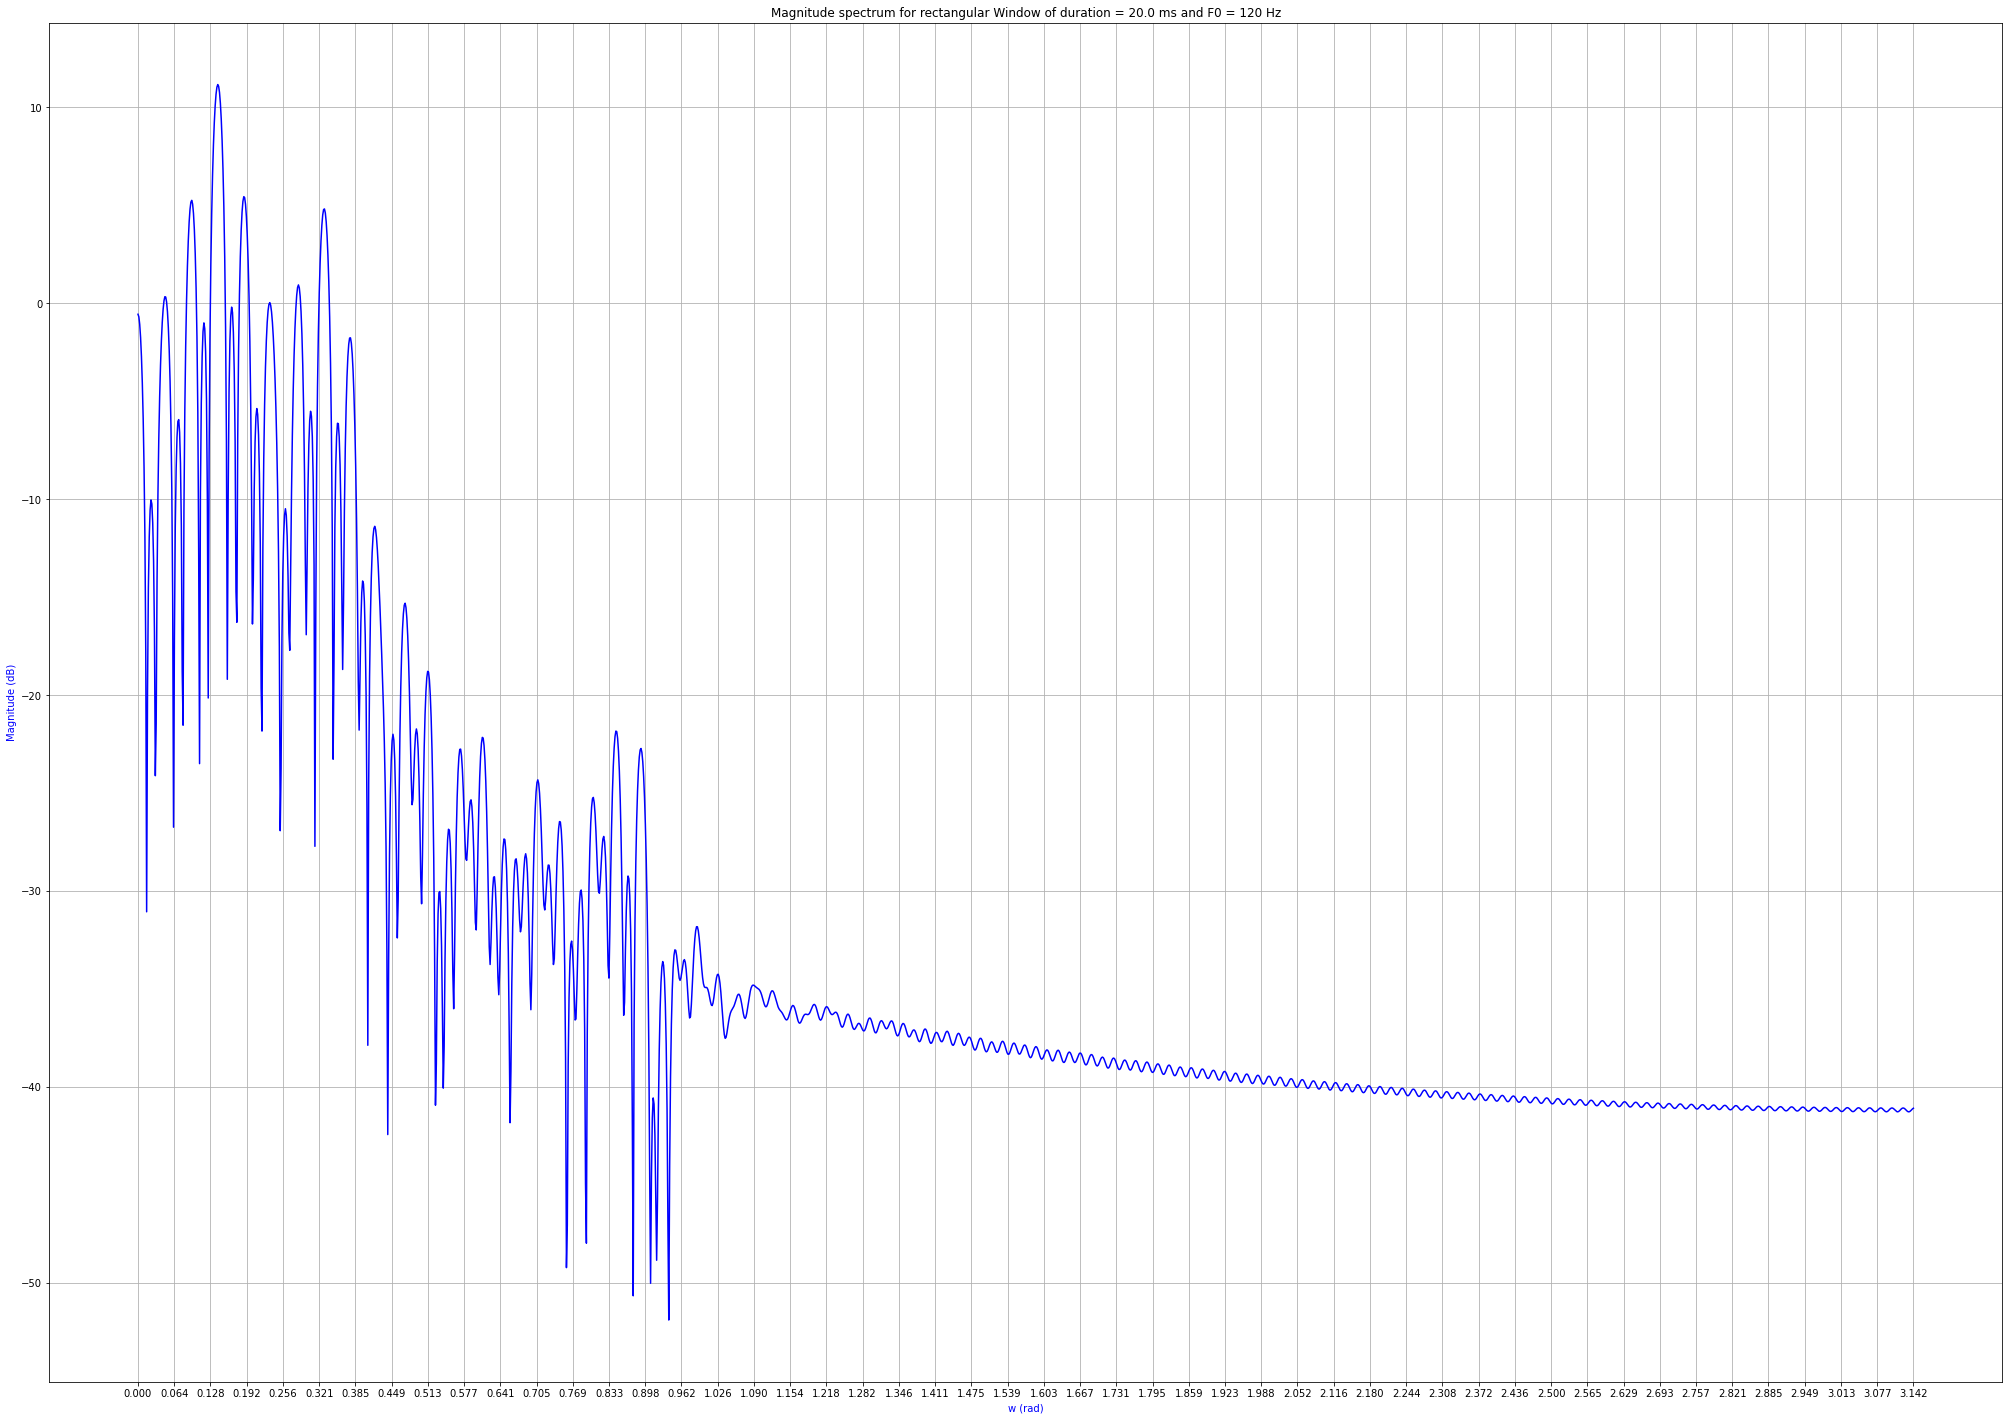

In [777]:
'''
As given in assignment statement we will use the waveform segment near the center of synthesized vowel 
'''
# Here we multiply the synthesized /u/ signal with the window signal by taking element wise multiplication
windowedSignal = np.multiply(rectWin,outputData_F3[int(sampFreq/F0):int(sampFreq/F0) + int(winDuration*sampFreq)]); 
windowedSignal_dft = np.fft.fft(windowedSignal, n=dft_len, norm= 'forward');    # Find the dft of windowed signal at specified number of dft points
mag = 20*np.log10(np.abs(windowedSignal_dft));                 # Find out the magnitude of the computed DFT 

fig = plt.figure(figsize=(35, 25));
plt.title('Magnitude spectrum for rectangular Window of duration = ' + str(winDuration*1e3) + ' ms and F0 = ' + str(F0) + ' Hz'); # title of the plot
plt.plot(np.linspace(0,np.pi,int(dft_len/2)), mag[0:int(dft_len/2)], color = 'b');      # Plot only the 5 pitch periods    
plt.xticks(np.linspace(0, np.pi, 50, endpoint=True));
plt.ylabel('Magnitude (dB)', color='b');                                   # set the y axis label 
plt.xlabel('w (rad)',color='b');                                           # set the discrete time axis label
plt.grid();                                                                # display the grid of the plot 
plt.axis('tight');                                                         # sets limits just large enough to show all data
plt.show();

**DFT magnitude spectrum for F0 = 120 Hz; Window = 'Rectangular'; Window duration = 20 ms :**

1) First the window was applied on the synthesized vowel /u/ and then the 4096 point DFT of that signal was computed.

2) The magnitude spectrum for 0 to pi interval on w-axis is plotted in the above figure.

In [778]:
'''
F1, F2 AND F3 CALCULATION FOR RECTANGULAR WINDOW FOR WINDOW DURATION = 20 ms 
'''
print("The following are the formant calculations and corresponding errors for rectangular Window: ");
F1 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.128, w2=0.192,DFTArray=mag);
print("Predicted Formant F1 = " + str(F1) + " Hz");
print("Error in F1 = " + str(np.abs(F1-300)) + " Hz");

F2 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.321, w2=0.385,DFTArray=mag);
print("Predicted Formant F2 = " + str(F2) + " Hz");
print("Error in F2 = " + str(np.abs(F2-870)) + " Hz");

F3 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.870, w2=0.898,DFTArray=mag);
print("Predicted Formant F3 = " + str(F3) + " Hz");
print("Error in F3 = " + str(np.abs(F3-2240)) + " Hz");

F01 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.449, w2=0.513,DFTArray=mag);
F02 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.491, w2=0.520,DFTArray=mag);
pitch_fund_Freq = np.abs(F01-F02);
print("Predicted Frequency F0 = " + str(pitch_fund_Freq) + ' Hz');
print("Error in F0 = " + str(np.abs(pitch_fund_Freq-120)) + ' Hz');

The following are the formant calculations and corresponding errors for rectangular Window: 
Predicted Formant F1 = 359 Hz
Error in F1 = 59 Hz
Predicted Formant F2 = 839 Hz
Error in F2 = 31 Hz
Predicted Formant F3 = 2265 Hz
Error in F3 = 25 Hz
Predicted Frequency F0 = 101 Hz
Error in F0 = 19 Hz


**Observations for 20 ms Rectangular Window:**

1) Due to an increase in the Window duration, the main lobe of rectangular window has become narrower as compared to 10 ms case. The frequency resolution has increased further.

2) In this case, the individual harmonics of F0 are clearly visible and hence the calculation of F0 frequency is having very less error as compared to previous 5 ms case.

3) For calculating F0 I took two ranges of w values (0.449,0.513) and (0.491,0.520). Frequency in Hz corresponding to peaks in each of these w ranges were found and difference between them gives the F0 value shown in above code cell.

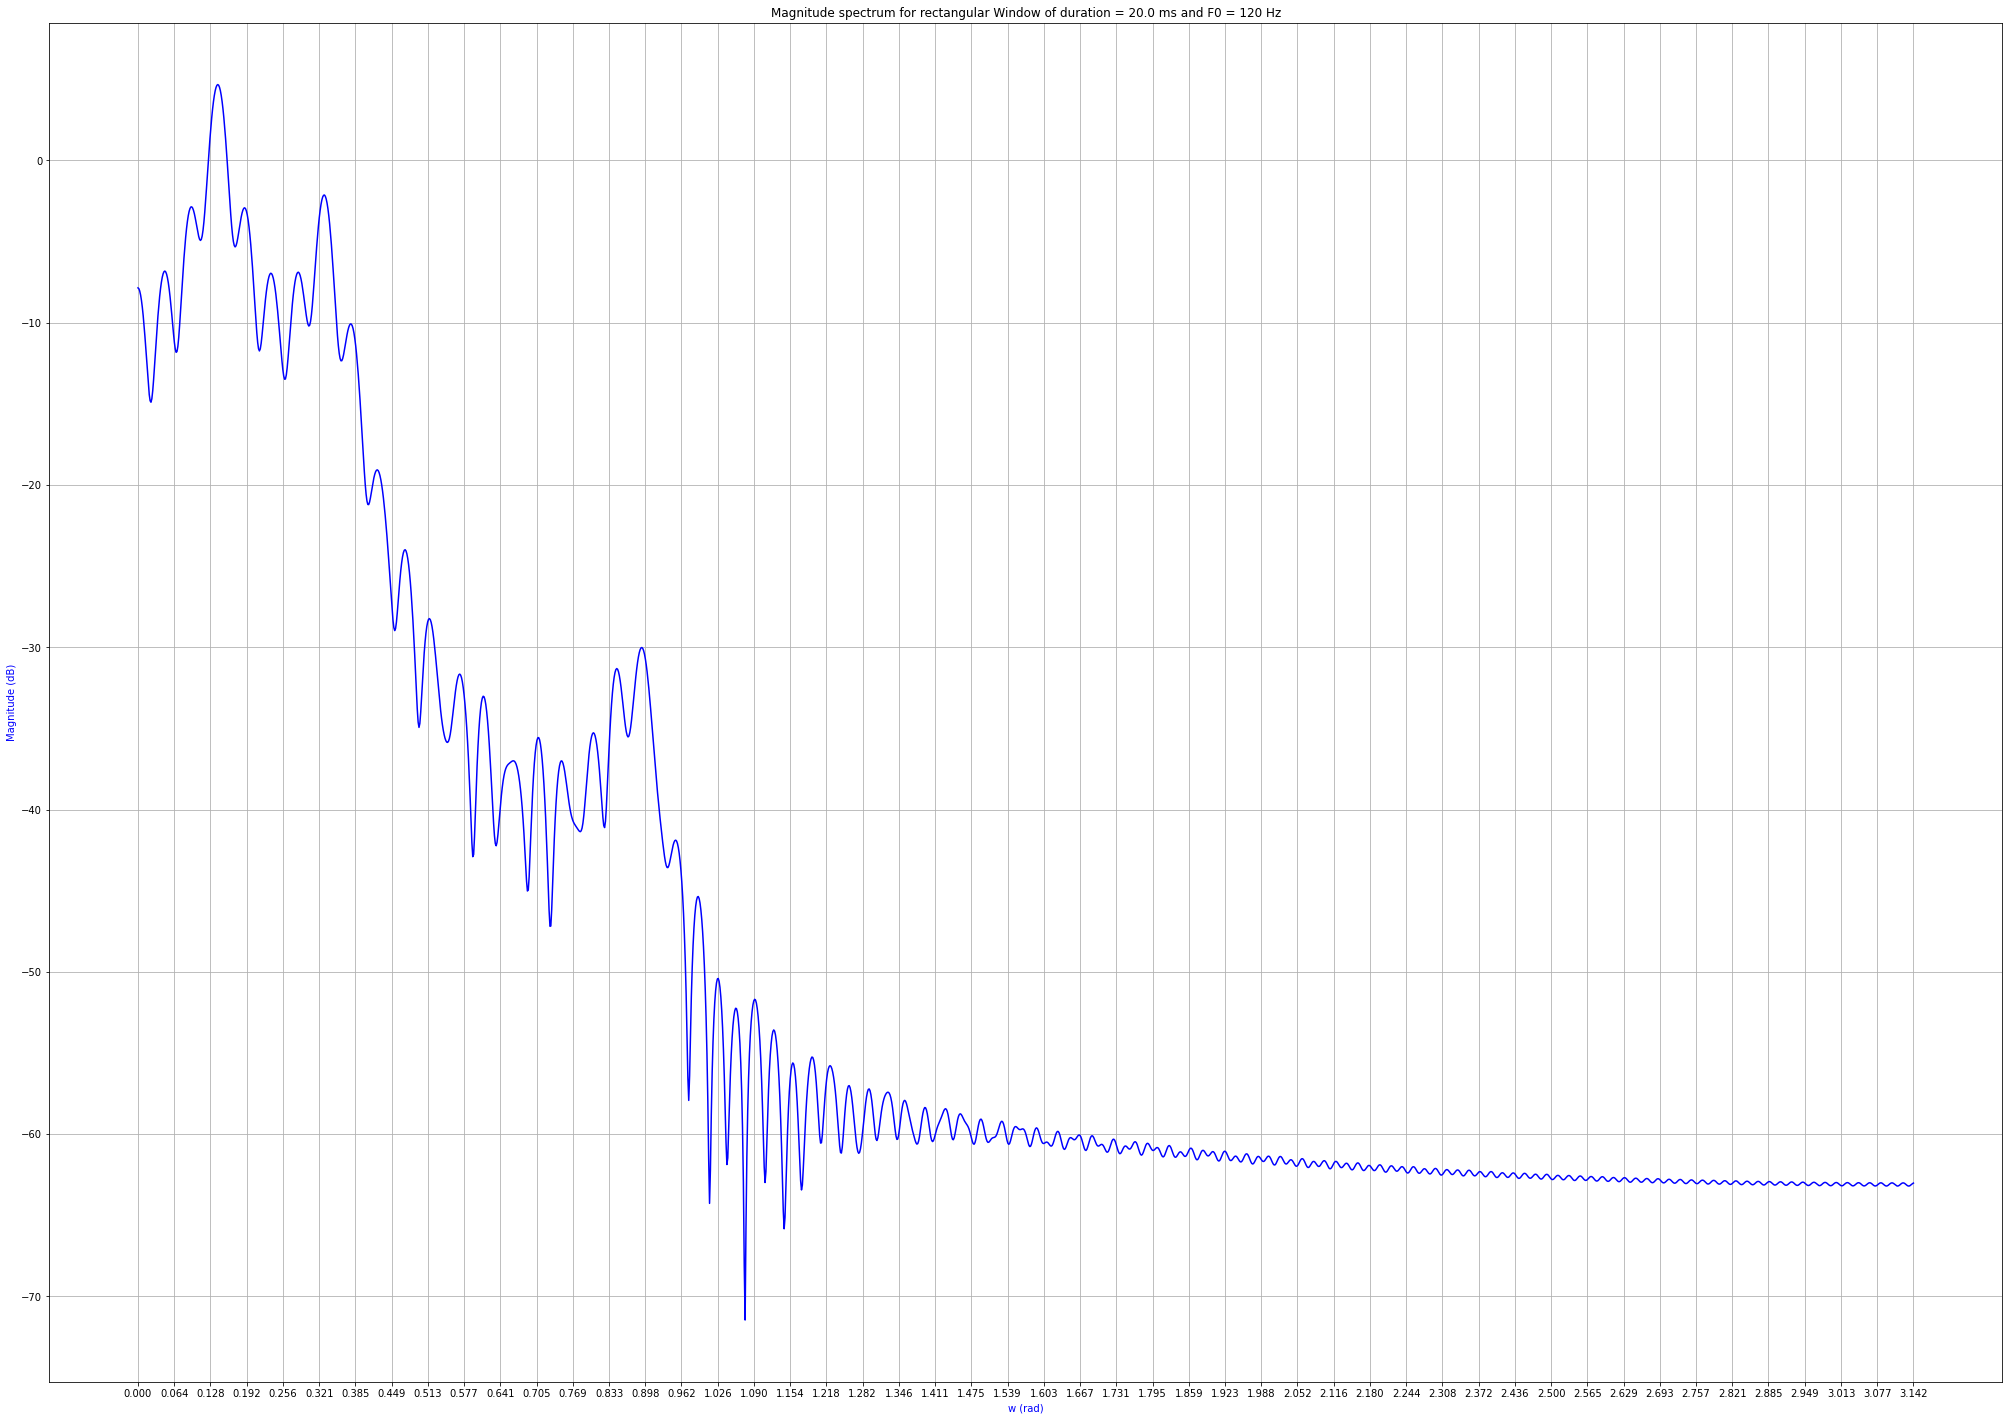

In [779]:
# Here we multiply the synthesized /u/ signal with the window signal by taking element wise multiplication
windowedSignal = np.multiply(hammingWindow,outputData_F3[int(sampFreq/F0):int(sampFreq/F0) + int(winDuration*sampFreq)]); 
windowedSignal_dft = np.fft.fft(windowedSignal, n=dft_len, norm='forward');    # Find the dft of windowed signal at specified number of dft points
mag = 20*np.log10(np.abs(windowedSignal_dft));                                 # Find out the magnitude of the computed DFT 

fig = plt.figure(figsize=(35, 25));
plt.title('Magnitude spectrum for rectangular Window of duration = ' + str(winDuration*1e3) + ' ms and F0 = ' + str(F0) + ' Hz'); # title of the plot
plt.plot(np.linspace(0,np.pi,int(dft_len/2)), mag[0:int(dft_len/2)], color = 'b');      # Plot only the 5 pitch periods    
plt.xticks(np.linspace(0, np.pi, 50, endpoint=True));
plt.ylabel('Magnitude (dB)', color='b');                                   # set the y axis label 
plt.xlabel('w (rad)',color='b');                                           # set the discrete time axis label
plt.grid();                                                                # display the grid of the plot 
plt.axis('tight');                                                         # sets limits just large enough to show all data
plt.show();

In [780]:
'''
F1, F2 AND F3 CALCULATION FOR HAMMING WINDOW FOR WINDOW DURATION = 20 ms
'''
print("The following are the formant calculations and corresponding errors for Hamming Window: ");
F1 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.064, w2=0.192,DFTArray=mag);
print("Predicted Formant F1 = " + str(F1) + " Hz");
print("Error in F1 = " + str(np.abs(F1-300)) + " Hz");

F2 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.321, w2=0.385,DFTArray=mag);
print("Predicted Formant F2 = " + str(F2) + " Hz");
print("Error in F2 = " + str(np.abs(F2-870)) + " Hz");

F3 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.833, w2=0.898,DFTArray=mag);
print("Predicted Formant F3 = " + str(F3) + " Hz");
print("Error in F3 = " + str(np.abs(F3-2240)) + " Hz");

F01 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.449, w2=0.513,DFTArray=mag);
F02 = findFormant(sampFrequency=sampFreq, numDFTpoints=dft_len, w1=0.491, w2=0.520,DFTArray=mag);
pitch_fund_Freq = np.abs(F01-F02);
print("Predicted Frequency F0 = " + str(pitch_fund_Freq) + ' Hz');
print("Error in F0 = " + str(np.abs(pitch_fund_Freq-120)) + ' Hz');

The following are the formant calculations and corresponding errors for Hamming Window: 
Predicted Formant F1 = 359 Hz
Error in F1 = 59 Hz
Predicted Formant F2 = 839 Hz
Error in F2 = 31 Hz
Predicted Formant F3 = 2269 Hz
Error in F3 = 29 Hz
Predicted Frequency F0 = 109 Hz
Error in F0 = 11 Hz


**Observations for 20 ms Hamming Window:**

1) Due to an increase in the Window duration, the main lobe of rectangular window has become narrower as compared to 10 ms case. The error in calculation of all the frequencies has reduced.

2) In this case, the individual harmonics of F0 are clearly visible and hence the calculation of F0 frequency is having very less error as compared to previous 5 ms case.

3) For calculating F0 I took two ranges of w values (0.449,0.513) and (0.491,0.520). Frequency in Hz corresponding to peaks in each of these ranges of w were found and difference between them gives the F0 value.

##Analysis for Rectangular and Hamming windows for duration = 40 ms and F0 = 120 Hz##